In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
credit_card_data = pd.read_csv("/content/creditcard.csv", error_bad_lines=False);

In [ ]:
#kako izgledaju podaci
credit_card_data.head().append(credit_card_data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
282799,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
282800,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
282801,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
282802,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
282803,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [ ]:
#informacije o podacima
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282804 entries, 0 to 282803
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    282804 non-null  float64
 1   V1      282804 non-null  float64
 2   V2      282804 non-null  float64
 3   V3      282804 non-null  float64
 4   V4      282804 non-null  float64
 5   V5      282804 non-null  float64
 6   V6      282804 non-null  float64
 7   V7      282804 non-null  float64
 8   V8      282804 non-null  float64
 9   V9      282804 non-null  float64
 10  V10     282804 non-null  float64
 11  V11     282804 non-null  float64
 12  V12     282804 non-null  float64
 13  V13     282804 non-null  object 
 14  V14     282804 non-null  float64
 15  V15     282804 non-null  float64
 16  V16     282804 non-null  float64
 17  V17     282804 non-null  float64
 18  V18     282804 non-null  float64
 19  V19     282804 non-null  float64
 20  V20     282804 non-null  float64
 21  V21     28

In [ ]:
#proveravamo da li negde fale podaci
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#šta treba da predvidimo?
credit_card_data['Class'].value_counts()


0.0    282312
1.0       491
Name: Class, dtype: int64

In [ ]:
#deljenje podataka
fraud = credit_card_data[credit_card_data.Class == 1]
good = credit_card_data[credit_card_data.Class == 0]

In [ ]:
print(good.shape)
print(fraud.shape)

(282312, 31)
(491, 31)


In [ ]:
#deskriptivna statistika
good.Amount.describe()

count    282312.000000
mean         88.455170
std         250.701086
min           0.000000
25%           5.570000
50%          22.000000
75%          77.370000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     491.000000
mean      121.971568
std       256.889925
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#kada ih uporedimo:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,95477.437665,0.009245,-0.008015,0.006158,-0.009941,0.005066,-0.000942,0.011384,-0.001174,-0.003121,...,-0.000987,-0.000184,0.002225,0.000017,-0.000026,-0.000629,0.000574,-0.000204,-0.000226,88.455170
1.0,80902.173116,-4.776976,3.627576,-7.046873,4.546534,-3.155969,-1.400429,-5.581218,0.572611,-2.585895,...,0.373953,0.715641,0.015976,-0.040742,-0.105167,0.041851,0.052858,0.170842,0.076133,121.971568


In [ ]:
#napravićemo novi dataset koji posmatra sličnu distribuciju transakcija
good_sample = good.sample(n=492)
new_dataset = pd.concat([good_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133374,81226.0,1.102630,-0.142344,1.286535,1.235751,-0.986385,0.111451,-0.704634,0.276215,0.734895,...,-0.016527,0.080907,-0.011962,0.321360,0.360801,-0.424649,0.063509,0.027303,12.99,0.0
62611,51226.0,1.184118,-0.102071,0.487790,0.161491,-0.753465,-1.051367,-0.039256,-0.165730,0.335693,...,-0.302509,-1.028982,0.167235,0.391354,-0.000178,0.471085,-0.071366,0.021714,50.00,0.0
165776,118879.0,-1.475522,0.727327,-0.369869,-0.816682,0.765739,0.028844,0.359992,0.328679,0.217889,...,0.149143,0.843341,0.117144,0.271799,0.044552,0.147777,-0.143533,0.132236,7.53,0.0
200752,134476.0,-7.447801,6.642062,-3.896249,-2.385260,-0.737504,-0.988008,0.565528,0.547143,5.776678,...,-1.343823,-1.237345,0.426095,0.482281,1.075657,0.093622,2.196404,0.867383,8.94,0.0
12104,25099.0,1.046067,0.375028,1.085677,2.838927,-0.167742,0.577102,-0.339008,0.198427,0.857986,...,-0.137099,0.010949,-0.027548,0.181053,0.459154,0.038620,-0.008587,0.003019,11.37,0.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0    491
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
133374   81226.0  1.102630 -0.142344  1.286535  1.235751 -0.986385  0.111451   
62611    51226.0  1.184118 -0.102071  0.487790  0.161491 -0.753465 -1.051367   
165776  118879.0 -1.475522  0.727327 -0.369869 -0.816682  0.765739  0.028844   
200752  134476.0 -7.447801  6.642062 -3.896249 -2.385260 -0.737504 -0.988008   
12104    25099.0  1.046067  0.375028  1.085677  2.838927 -0.167742  0.577102   
...          ...       ...       ...       ...       ...       ...       ...   
277860  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
278140  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
278146  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
279141  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
279671  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(y)

133374    0.0
62611     0.0
165776    0.0
200752    0.0
12104     0.0
         ... 
277860    1.0
278140    1.0
278146    1.0
279141    1.0
279671    1.0
Name: Class, Length: 983, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(983, 30) (786, 30) (197, 30)


In [ ]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
model.fit(x_train, y_train)

In [ ]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9402035623409669


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
x_test_prediction = model.predict(x_test)
accuracy1 = accuracy_score(x_test_prediction, y_test)
precision1=precision_score(x_test_prediction, y_test)
recall1=recall_score(x_test_prediction, y_test)
fscore1=f1_score(x_test_prediction, y_test)
print('Accuracy score:', accuracy1)
print('\n Precision :\n',precision1 )
print("\n Recall :\n", recall1)
print("\n F1 Skor :\n", fscore1)

Accuracy score: 0.9441624365482234

 Precision :
 0.9183673469387755

 Recall :
 0.967741935483871

 F1 Skor :
 0.9424083769633509


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(x_train, y_train)
predicted=classifier.predict(x_test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0.]


In [ ]:
from sklearn import metrics
DecisionTree= metrics.accuracy_score(y_test, predicted) * 100
print("\n The Accuracy Score : ", DecisionTree)


 The Accuracy Score :  92.38578680203045


In [ ]:
precision=precision_score(y_test, predicted, pos_label=1)*100
print('\n Precision :\n',precision )


 Precision :
 94.6236559139785


In [ ]:
recall=recall_score(y_test, predicted, pos_label=1)*100
print("\n Recall :\n", recall)


 Recall :
 89.79591836734694


In [ ]:
fscore=f1_score(y_test, predicted, pos_label=1)*100
print("\n F1 Skor :\n", fscore)


 F1 Skor :
 92.14659685863874


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_tree.fit(x_train, y_train);
clf_reg.fit(x_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
  y_score1 = clf_tree.predict_proba(x_test)[:,1]
  y_score2 = clf_reg.predict_proba(x_test)[:,1]
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
  false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
  print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.9086786229643372
roc_auc_score for Logistic Regression:  0.9821686250257678


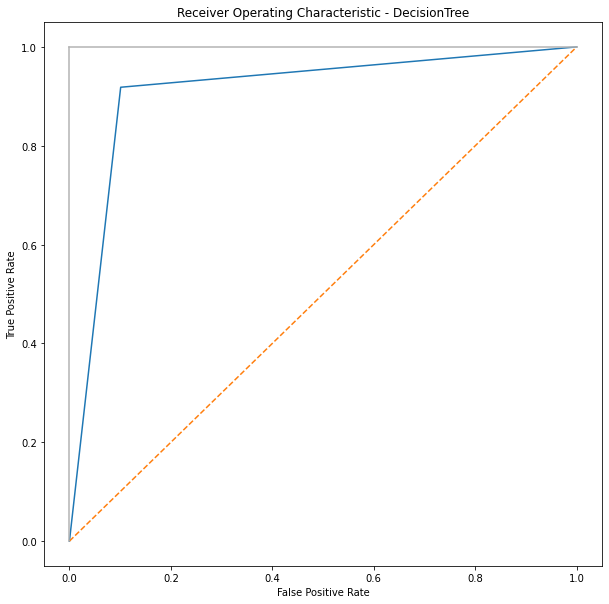

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

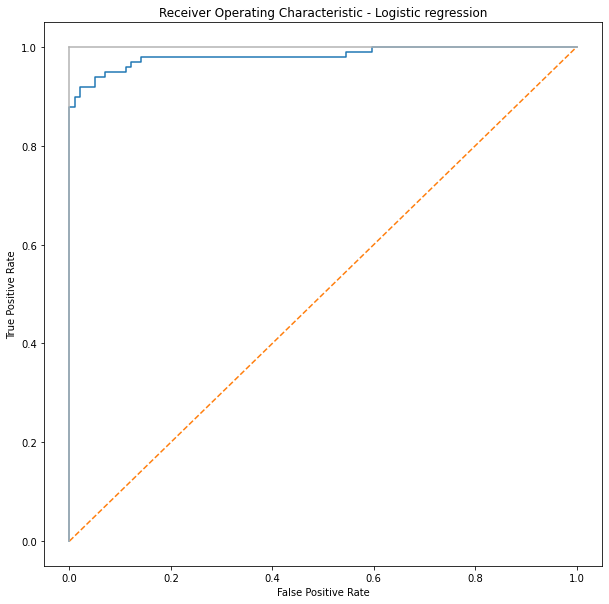

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Decision Tree Confusion Matrix: ", confusion_matrix(y_test, x_test_prediction))
print("Logistic Regression Confusion Matrix: ", confusion_matrix(y_test, predicted))

Decision Tree Confusion Matrix:  [[96  3]
 [ 8 90]]
Logistic Regression Confusion Matrix:  [[94  5]
 [10 88]]


In [ ]:
from sklearn.metrics import classification_report
print("Decision Tree Classification Report: ", classification_report(y_test, x_test_prediction))
print("Logistic Regression Classification Report: ", classification_report(y_test, predicted))

Decision Tree Classification Report:                precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        99
         1.0       0.97      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197

Logistic Regression Classification Report:                precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        99
         1.0       0.95      0.90      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

